In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# FASE 1: FLUJO LIMPIEZA Y TRANSFORMACIÓN DE DATOS

# Pasos:
# Lectura de Datos
# Exploración inicial y estructura de los datos
# Identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes
# Transformación de tipo de datos y estandarización de nombre de variables
# Estadísticas básicas variables numéricas y frecuencias variables categóricas
# Limpieza y transformación dependiendo de lo anterior
# Identificación y gestión de nulos
# Unir los 2 data frames de la forma más eficiente
# Identificación y gestión de duplicados

## FASE 1

##### Lectura de Datos y exploración inicial:

# Customer_Flight_Activity

In [149]:
df_Flight_Activity = pd.read_csv('Customer_Flight_Activity.csv') 
df_Flight_Activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [67]:
df_Flight_Activity.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [68]:
df_Flight_Activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
265692,746226,2018,4,0,0,0,0,0.0,0,0
105665,328349,2017,7,0,0,0,0,0.0,0,0
385698,836964,2018,11,0,0,0,0,0.0,0,0
36587,250194,2017,3,0,0,0,0,0.0,0,0
8710,564959,2017,1,0,0,0,0,0.0,0,0


In [150]:
def exploracion_inicial(df_Flight_Activity):
   
    print("Exploración inicial de Customer Flight Activity")
    print(f"Tamaño del DataFrame: {df_Flight_Activity.shape[0]} filas y {df_Flight_Activity.shape[1]} columnas")

    print("\nNombres de las columnas:")
    print(df_Flight_Activity.columns.tolist())

    print("\nTipos de datos por columna:")
    print(df_Flight_Activity.dtypes)

    print("\nEstadísticas descriptivas de columnas numéricas:")
    print(df_Flight_Activity.describe(include="all").T)

    print("\nCantidad de valores únicos por columna:")
    print(df_Flight_Activity.nunique())

    # Verificar si hay valores negativos en cualquier columna numérica
    columnas_numericas = df_Flight_Activity.select_dtypes(include=["int64", "float64"]).columns
    valores_negativos = (df_Flight_Activity[columnas_numericas] < 0).sum()

    print("\nValores negativos por columna:")
    print(valores_negativos)

exploracion_inicial(df_Flight_Activity)

Exploración inicial de Customer Flight Activity
Tamaño del DataFrame: 405624 filas y 10 columnas

Nombres de las columnas:
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Tipos de datos por columna:
Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

Estadísticas descriptivas de columnas numéricas:
                                count           mean            std       min  \
Loyalty Number               405624.0  550037.873084  258935.286969  100018.0   
Year                         405624.0    2017.5000

In [151]:
# Para evitar posibles errores en la interpretación de datos, decidimos transfomrar la variable Month de numérica a categórica.

print("Comprobación de valores únicos en Month antes de la conversión:")
print(df_Flight_Activity["Month"].unique())

Comprobación de valores únicos en Month antes de la conversión:
[ 1  9  2  3 11  4  5  7  6  8 10 12]


In [152]:
# Reemplazo de valores numéricos por nombres de meses

df_Flight_Activity["Month"] = df_Flight_Activity["Month"].replace({
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
})

# Conversión a una categoría ordenada (evitamos así que se ordene alfabéticamente)

df_Flight_Activity["Month"] = pd.Categorical(
    df_Flight_Activity["Month"],
    categories=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
                "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    ordered=True
)

In [153]:
# Revisión de los valores únicos después de la conversión

print("Valores únicos en Month tras la conversión:")
print(df_Flight_Activity["Month"].unique())

# Comprobación

df_Flight_Activity.sample(5)

Valores únicos en Month tras la conversión:
['Enero', 'Septiembre', 'Febrero', 'Marzo', 'Noviembre', ..., 'Julio', 'Junio', 'Agosto', 'Octubre', 'Diciembre']
Length: 12
Categories (12, object): ['Enero' < 'Febrero' < 'Marzo' < 'Abril' ... 'Septiembre' < 'Octubre' < 'Noviembre' < 'Diciembre']


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
200895,896951,2017,Diciembre,8,0,8,2736,273.0,0,0
305517,169950,2018,Julio,0,0,0,0,0.0,0,0
13222,801338,2017,Enero,0,0,0,0,0.0,0,0
203090,114553,2018,Enero,1,1,2,418,41.0,0,0
388068,327285,2017,Septiembre,6,3,9,675,67.0,342,28


##### Lectura de Datos y exploración inicial:

# Customer_Loyalty_History

In [154]:
df_Loyalty_History = pd.read_csv('Customer_Loyalty_History.csv') 
df_Loyalty_History.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [72]:
df_Loyalty_History.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
12670,133035,Canada,Yukon,Whitehorse,Y2K 6R0,Male,College,NaN,Single,Star,4236.81,Standard,2017,2,NaN,NaN
1310,601131,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Doctor,170041.0,Married,Aurora,5584.96,Standard,2016,2,NaN,NaN
9318,297306,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,89745.0,Married,Nova,16138.42,Standard,2016,6,NaN,NaN
5786,577726,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,78573.0,Divorced,Nova,4376.36,Standard,2014,2,NaN,NaN
2490,169131,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Married,Aurora,8236.92,Standard,2018,7,NaN,NaN


In [73]:
df_Loyalty_History.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [155]:
def exploracion_inicial(df_Loyalty_History):
   
    print("Exploración inicial de Customer Loyalty History")
    print(f"Tamaño del DataFrame: {df_Loyalty_History.shape[0]} filas y {df_Loyalty_History.shape[1]} columnas")

    print("\nNombres de las columnas:")
    print(df_Loyalty_History.columns.tolist())

    print("\nTipos de datos por columna:")
    print(df_Loyalty_History.dtypes)

    print("\nEstadísticas descriptivas de columnas numéricas:")
    print(df_Loyalty_History.describe(include="all").T)

    print("\nCantidad de valores únicos por columna:")
    print(df_Loyalty_History.nunique())

    # Verificar si hay valores negativos en cualquier columna numérica
    columnas_numericas = df_Loyalty_History.select_dtypes(include=["int64", "float64"]).columns
    valores_negativos = (df_Loyalty_History[columnas_numericas] < 0).sum()

    print("\nValores negativos por columna:")
    print(valores_negativos)

exploracion_inicial(df_Loyalty_History)

Exploración inicial de Customer Loyalty History
Tamaño del DataFrame: 16737 filas y 16 columnas

Nombres de las columnas:
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Tipos de datos por columna:
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

Estadísticas descriptivas de columnas numéricas:
                      count unique       top   freq           mea

In [156]:
print(df_Loyalty_History["Salary"][df_Loyalty_History["Salary"] < 0])   # Hay valores negativos en Salary, analizamos a qué puede deberse.
print(df_Loyalty_History["Salary"][df_Loyalty_History["Salary"] > 0])   # Deducimos que puede ser un error en la carga de estos datos, ya que comparten rango con los valores positivos.

1082    -49830.0
1894    -12497.0
2471    -46683.0
3575    -45962.0
3932    -19325.0
4712    -43234.0
6560    -10605.0
6570    -17534.0
7373    -58486.0
8576    -31911.0
8767    -49001.0
10232   -34079.0
11635    -9081.0
12596   -46470.0
13564   -26322.0
14327   -47310.0
14355   -39503.0
15416   -19332.0
16431   -46303.0
16735   -57297.0
Name: Salary, dtype: float64
0         83236.0
4        103495.0
5         51124.0
7        100159.0
8        100159.0
           ...   
16728     61718.0
16729     88425.0
16730     76778.0
16733     89210.0
16736     75049.0
Name: Salary, Length: 12479, dtype: float64


In [157]:
df_Loyalty_History.loc[df_Loyalty_History["Salary"] < 0, "Salary"] = df_Loyalty_History["Salary"] * -1  # Los convertimos en positivo 
print((df_Loyalty_History["Salary"] < 0).sum())  # Comprobación

0


In [158]:
# Observamos que la columna country repite el total de filas (16737) como dato único Canadá

print(df_Loyalty_History["Country"].nunique())  # Comprobación
df_Loyalty_History.drop(columns=["Country"], inplace=True) # Al ser una columna que no aporta valor, la borramos (sabiendo que city y province siempre serán de Canadá)

1


In [159]:
def organizar_nulos(df_Loyalty_HistoryH):
   
    resumen = []

    for columna in df_Loyalty_History.columns:
        # Calcular el porcentaje de nulos
        nulos_pct = (df_Loyalty_History[columna].isnull().sum() / len(df_Loyalty_History)) * 100
        
        # Incluir solo columnas con nulos
        if nulos_pct > 0:
            tipo = "Numérica" if df_Loyalty_History[columna].dtype in ['int64', 'float64'] else "Categórica"

            # Agregar al resumen
            resumen.append({
                "Columna": columna,
                "Tipo": tipo,
                "Porcentaje_Nulos": nulos_pct
            })

    # Convertir a DataFrame y ordenar por porcentaje de nulos
    resumen_df_Loyalty_History = pd.DataFrame(resumen).sort_values(by="Porcentaje_Nulos", ascending=False)
    return resumen_df_Loyalty_History


resumen_nulos = organizar_nulos(df_Loyalty_History)
print(resumen_nulos)

              Columna      Tipo  Porcentaje_Nulos
1   Cancellation Year  Numérica         87.650117
2  Cancellation Month  Numérica         87.650117
0              Salary  Numérica         25.321145


In [160]:
print("\nEjemplo de valores en ambas columnas:")
print(df_Loyalty_History[["Cancellation Year", "Cancellation Month"]].head(20))
print(df_Loyalty_History[["Cancellation Year", "Cancellation Month"]].tail(20))
print(df_Loyalty_History[["Cancellation Year", "Cancellation Month"]].sample(20))

# Los negativos en Year y Month coinciden según ID


Ejemplo de valores en ambas columnas:
    Cancellation Year  Cancellation Month
0                 NaN                 NaN
1                 NaN                 NaN
2              2018.0                 1.0
3                 NaN                 NaN
4                 NaN                 NaN
5                 NaN                 NaN
6                 NaN                 NaN
7                 NaN                 NaN
8                 NaN                 NaN
9                 NaN                 NaN
10                NaN                 NaN
11                NaN                 NaN
12                NaN                 NaN
13                NaN                 NaN
14                NaN                 NaN
15                NaN                 NaN
16                NaN                 NaN
17                NaN                 NaN
18                NaN                 NaN
19             2018.0                 1.0
       Cancellation Year  Cancellation Month
16717                NaN          

In [117]:
# Si los valores NaN en Cancellation Year/Month significan que el cliente no ha cancelado su programa de lealtad, podemos transformar estos datos en una nueva variable categórica que sea Active.

In [161]:
# Creamos una nueva columna llamada Status con dos valores:

# "Active" si Cancellation Year es NaN (es decir, nunca canceló).
# "Cancelled" si Cancellation Year tiene un valor numérico (canceló en ese año).

def definir_status(cancellation_year):
    if pd.isna(cancellation_year):  # Si es NaN, el cliente sigue activo
        return "Active"
    else:  # Si tiene un año registrado, significa que canceló
        return "Cancelled"

# Aplicar la función a la columna "Cancellation Year" y crear la nueva columna "Status"
df_Loyalty_History["Status"] = df_Loyalty_History["Cancellation Year"].apply(definir_status)

# Verificar resultados
print(df_Loyalty_History[["Cancellation Year", "Status"]].head(10))


   Cancellation Year     Status
0                NaN     Active
1                NaN     Active
2             2018.0  Cancelled
3                NaN     Active
4                NaN     Active
5                NaN     Active
6                NaN     Active
7                NaN     Active
8                NaN     Active
9                NaN     Active


In [162]:
# Viendo que no será de utilidad para nuestro análisis el mes o el año de cancelación del programa, decidimos eliminar ambas columnas.

df_Loyalty_History.drop(columns=["Cancellation Year", "Cancellation Month"], inplace=True)

In [163]:
df_Loyalty_History.head() # Comprobamos cómo queda finalmente la tabla

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Status
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,Active
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,Active
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,Cancelled
3,608370,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,Active
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,Active


In [164]:
# Vamos a analizar los datos de slary para ver con qué imputamos los nulos

print("Media de Salary:", df_Loyalty_History["Salary"].mean())
print("Mediana de Salary:", df_Loyalty_History["Salary"].median())


Media de Salary: 79359.34090727258
Mediana de Salary: 73455.0


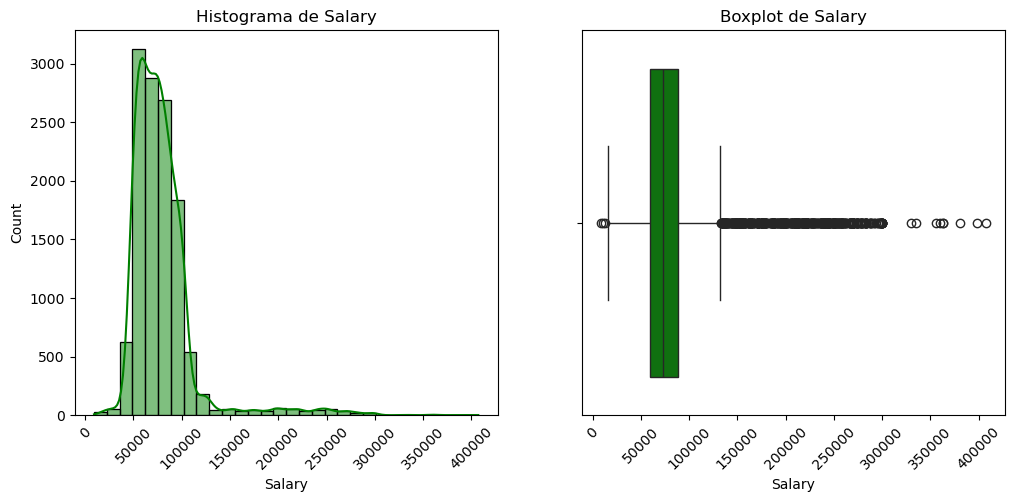

In [165]:
plt.figure(figsize=(12, 5))

# Histograma en verde con rotación de etiquetas
plt.subplot(1, 2, 1)
sns.histplot(df_Loyalty_History["Salary"].dropna(), kde=True, bins=30, color="green")
plt.title("Histograma de Salary")
plt.xticks(rotation=45)

# Boxplot en verde
plt.subplot(1, 2, 2)
sns.boxplot(x=df_Loyalty_History["Salary"], color="green")
plt.title("Boxplot de Salary")
plt.xticks(rotation=45)

plt.show()

In [166]:
df_Loyalty_History["Salary"].fillna(df_Loyalty_History["Salary"].median())

# Reemplazamos los valores nulos (NaN) en Salary con la mediana de la columna, que es más robusta ante distribuciones asimétricas.

0         83236.0
1         73455.0
2         73455.0
3         73455.0
4        103495.0
           ...   
16732     73455.0
16733     89210.0
16734     73455.0
16735     57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

In [167]:
print("¿Quedan valores nulos en el DataFrame CLH?", df_Loyalty_History.isnull().values.any()) # Comporbación final de nulos en el df Loyalty History

¿Quedan valores nulos en el DataFrame CLH? True


#### Unión de los dos DataFrames

In [168]:
print(df_Flight_Activity.columns)
print(df_Loyalty_History.columns)

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Status'],
      dtype='object')


In [169]:
# Los dos DataFrames tienen información diferente sobre los mismos clientes (columnas distintas pero misma clave).
# Garantizamos que todos los clientes con actividad de vuelo estarán en el DF final, aunque no tengan historial de lealtad.

df_unido = df_Flight_Activity.merge(df_Loyalty_History, on="Loyalty Number", how="left")

In [170]:
def exploracion_post_union(df):

    print("Exploración del DataFrame Unido\n")
    print(f"Tamaño del DataFrame: {df.shape[0]} filas y {df.shape[1]} columnas\n")
    
    print("Información del DataFrame:")
    print(df.info(), "\n")
    
    print("Muestra de datos aleatoria:")
    print(df.sample(3), "\n")

    print("Muestra estadísticas básicas:")
    print(df_unido.describe().T)
    
    print("Valores nulos por columna:")
    print(df.isnull().sum(), "\n")
    
    print(f"Número de duplicados: {df.duplicated().sum()}\n")
    
exploracion_post_union(df_unido)

Exploración del DataFrame Unido

Tamaño del DataFrame: 405624 filas y 23 columnas

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Loyalty Number               405624 non-null  int64   
 1   Year                         405624 non-null  int64   
 2   Month                        405624 non-null  category
 3   Flights Booked               405624 non-null  int64   
 4   Flights with Companions      405624 non-null  int64   
 5   Total Flights                405624 non-null  int64   
 6   Distance                     405624 non-null  int64   
 7   Points Accumulated           405624 non-null  float64 
 8   Points Redeemed              405624 non-null  int64   
 9   Dollar Cost Points Redeemed  405624 non-null  int64   
 10  Province                     405624 non-null  object  

#### Gestión de duplicados

In [171]:
print(df_unido[df_unido.duplicated()].head(10))  # Muestra las primeras 10 filas duplicadas

      Loyalty Number  Year    Month  Flights Booked  Flights with Companions  \
42            101902  2017    Enero               0                        0   
227           112142  2017    Enero               0                        0   
478           126100  2017    Enero               0                        0   
567           130331  2017    Enero               0                        0   
660           135421  2017    Enero               0                        0   
1035          156031  2017    Enero               0                        0   
1336          106509  2017    Enero               0                        0   
1348          106509  2017  Febrero               0                        0   
1420          106509  2017    Marzo               0                        0   
1458          106509  2017    Abril               0                        0   

      Total Flights  Distance  Points Accumulated  Points Redeemed  \
42                0         0                 0.0

In [172]:
df_unido[df_unido["Loyalty Number"] == 678205]  # Comprobación de duplicados con ID que comparte mes y año (y el resto de datos)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Status
10862,678205,2017,Enero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
10863,678205,2017,Enero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
10864,678205,2017,Enero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
27763,678205,2017,Febrero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
27764,678205,2017,Febrero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382684,678205,2018,Noviembre,11,0,11,1177,117.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
382685,678205,2018,Noviembre,8,1,9,1341,134.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
399585,678205,2018,Diciembre,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
399586,678205,2018,Diciembre,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active


In [173]:
print(f"Número de filas antes de eliminar duplicados: {df_unido.shape[0]}")

Número de filas antes de eliminar duplicados: 405624


In [174]:
df_unido = df_unido.drop_duplicates(subset=["Loyalty Number", "Month", "Year"], keep="first")

# Consideramos duplicados cuando estas tres columnas coincidan exactamente
# Conservando la primera aparición de cada conjunto duplicado y eliminando las demás

In [175]:
print(f"Número de filas después de eliminar duplicados: {df_unido.shape[0]}")
print(f"Duplicados restantes: {df_unido.duplicated(subset=['Loyalty Number', 'Month', 'Year']).sum()}")

Número de filas después de eliminar duplicados: 401688
Duplicados restantes: 0


In [176]:
df_unido[df_unido["Loyalty Number"] == 678205]  # Comprobación

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Status
10862,678205,2017,Enero,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
27763,678205,2017,Febrero,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
44664,678205,2017,Marzo,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
61565,678205,2017,Abril,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
78466,678205,2017,Mayo,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
95367,678205,2017,Junio,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
112268,678205,2017,Julio,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
129169,678205,2017,Agosto,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
146070,678205,2017,Septiembre,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
150225,678205,2018,Mayo,8,3,11,2794,279.00,478,39,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active


In [177]:
print(df_unido["Salary"].unique())

[92552.    nan 63253. ... 23160. 97206. 56345.]
